In [ ]:
import pandas as pd

# Load the IMDB dataset
imdb_data = pd.read_csv('/content/IMDb_Data_final.csv')

# Combine fields to create descriptive text for each movie
imdb_data['Combined_Text'] = imdb_data.apply(
    lambda row: f"{row['Title']} directed by {row['Director']} starring {row['Stars']} in the {row['Category']} genre.",
    axis=1
)

# Display sample data
print("Sample Combined Text:\n", imdb_data['Combined_Text'].head())


Sample Combined Text:
 0    Top Gun: Maverick directed by JosephKosinski s...
1    Everything Everywhere All at Once directed by ...
2    The Batman directed by MattReeves starring Rob...
3    Jurassic Park directed by StevenSpielberg star...
4    The Godfather directed by FrancisFordCoppola s...
Name: Combined_Text, dtype: object


In [ ]:
imdb_data.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,Combined_Text
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,Top Gun: Maverick directed by JosephKosinski s...
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,Everything Everywhere All at Once directed by ...
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,The Batman directed by MattReeves starring Rob...
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,Jurassic Park directed by StevenSpielberg star...
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,The Godfather directed by FrancisFordCoppola s...


In [ ]:
# Get the number of unique categories
categories = ground_truth['Category'].unique()
num_categories = len(categories)

# Print category information
print(f"Number of Categories: {num_categories}")
print("Categories:", categories)
print("\nGround Truth Distribution:")
print(ground_truth['Category'].value_counts())


Number of Categories: 202
Categories: ['Action,Adventure' 'Action,Adventure,Biography' 'Action,Adventure,Comedy'
 'Action,Adventure,Crime' 'Action,Adventure,Drama'
 'Action,Adventure,Fantasy' 'Action,Adventure,Horror'
 'Action,Adventure,Mystery' 'Action,Adventure,Romance'
 'Action,Adventure,Sci-Fi' 'Action,Adventure,Thriller'
 'Action,Adventure,War' 'Action,Adventure,Western'
 'Action,Biography,Crime' 'Action,Biography,Drama' 'Action,Comedy,Crime'
 'Action,Comedy,Fantasy' 'Action,Comedy,Horror' 'Action,Comedy,Mystery'
 'Action,Comedy,Romance' 'Action,Crime,Comedy' 'Action,Crime,Drama'
 'Action,Crime,Mystery' 'Action,Crime,Sci-Fi' 'Action,Crime,Thriller'
 'Action,Drama' 'Action,Drama,History' 'Action,Drama,Mystery'
 'Action,Drama,Sci-Fi' 'Action,Drama,Sport' 'Action,Drama,Thriller'
 'Action,Drama,War' 'Action,Drama,Western' 'Action,Mystery,Thriller'
 'Action,Sci-Fi' 'Action,Sci-Fi,Thriller' 'Action,Thriller'
 'Adventure,Biography,Drama' 'Adventure,Comedy,Crime'
 'Adventure,Comedy,Drama'

In [ ]:
# 10 diverse queries based on different categories, genres, or user intents
queries = [
    "Action movie with Tom Cruise",                        # Actor-specific query
    "Romantic movie starring Leonardo DiCaprio",           # Actor-specific query
    "Sci-fi movie directed by Christopher Nolan",          # Director-specific query
    "Drama movie with a compelling storyline",             # Genre-specific query
    "Comedy movie for family entertainment",               # Genre-specific query
    "Thriller movie with a plot twist",                    # Theme-based query
    "Fantasy movie about magic and adventure",             # Theme-based query
    "Crime movie based on true events",                    # Theme-based query
    "Horror movie set in a haunted house",                 # Theme-based query
    "Adventure movie in the jungle with animals"           # Theme-based query
]

# Generate embeddings for queries
query_embeddings = [model.encode(query) for query in queries]

# Display the queries
print("Sample Queries:\n", queries)


Sample Queries:
 ['Action movie with Tom Cruise', 'Romantic movie starring Leonardo DiCaprio', 'Sci-fi movie directed by Christopher Nolan', 'Drama movie with a compelling storyline', 'Comedy movie for family entertainment', 'Thriller movie with a plot twist', 'Fantasy movie about magic and adventure', 'Crime movie based on true events', 'Horror movie set in a haunted house', 'Adventure movie in the jungle with animals']


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for Combined_Text
imdb_data['Embedding'] = imdb_data['Combined_Text'].apply(lambda x: model.encode(x))
embeddings = np.vstack(imdb_data['Embedding'].values)  # Stack embeddings into a 2D array

# Display shape and sample embeddings
print("Shape of Embeddings:", embeddings.shape)

print("Sample Embeddings:\n", embeddings[:1])



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Shape of Embeddings: (1000, 384)
Sample Embeddings:
 [[-7.85223618e-02 -1.47853158e-02 -5.66053726e-02 -2.06327830e-02
   2.28275508e-02  4.90228869e-02  2.10219584e-02  6.12590052e-02
  -2.45449003e-02  3.59693961e-03 -4.81441058e-02  2.88872309e-02
   7.47076496e-02  5.52988052e-02 -9.84501443e-04  2.46691313e-02
   8.63037631e-02  9.12472531e-02  7.26895854e-02  8.15211423e-03
  -7.27289096e-02  1.46160112e-03  1.58165582e-02  3.86519656e-02
  -3.04145087e-02 -1.93068702e-02  5.46048023e-02  8.07028711e-02
  -1.74342826e-01 -3.61542553e-02  4.51822616e-02  1.53239788e-02
  -1.05806574e-01  1.99611951e-02  3.54970656e-02 -8.24165344e-03
  -4.91811102e-03 -8.59470945e-03 -2.80631948e-02 -5.10950573e-04
  -1.36827482e-02  8.57705716e-03  1.72092970e-02  1.47377364e-02
   5.61422110e-03 -7.08398074e-02 -4.73787822e-02 -5.86002059e-02
   2.11286768e-02  2.51344573e-02 -1.27420396e-01 -7.73349702e-02
  -5.48362434e-02 -4.54258583e-02  8.36705342e-02 -4.69069444e-02
   2.77147125e-02 -2.28

In [ ]:
!pip install faiss-cpu
!pip install annoy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552450 sha256=c91b9a086b3ca4c7c8885d575d3c115f24085f49c15a06f7f4c25d0aac45e02c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import faiss
from annoy import AnnoyIndex
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# FAISS IVF Setup
embedding_dim = embeddings.shape[1]
nlist = 100  # Number of clusters
quantizer = faiss.IndexFlatL2(embedding_dim)
faiss_ivf_index = faiss.IndexIVFFlat(quantizer, embedding_dim, nlist)
faiss_ivf_index.train(embeddings)
faiss_ivf_index.add(embeddings)
print("FAISS IVF Index built with", embeddings.shape[0], "embeddings.")

# Annoy Setup
annoy_index = AnnoyIndex(embedding_dim, 'angular')
for i, vec in enumerate(embeddings):
    annoy_index.add_item(i, vec)
annoy_index.build(10)  # Using 10 trees
print("Annoy Index built with", embeddings.shape[0], "embeddings.")

# HNSW Setup (Hierarchical Navigable Small World)
hnsw_index = faiss.IndexHNSWFlat(embedding_dim, 32)  # HNSW with 32 links
hnsw_index.add(embeddings)
print("HNSW Index built with", embeddings.shape[0], "embeddings.")

# TF-IDF for Text + Vector Search
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(imdb_data['Combined_Text'])
print("TF-IDF Matrix built with shape:", tfidf_matrix.shape)


FAISS IVF Index built with 1000 embeddings.
Annoy Index built with 1000 embeddings.
HNSW Index built with 1000 embeddings.
TF-IDF Matrix built with shape: (1000, 5033)


In [ ]:
# Cluster-based sampling with original indices preserved
n_per_group = 5
ground_truth = imdb_data.groupby('Category').apply(lambda x: x.sample(n=min(len(x), n_per_group), random_state=42))

# Preserve the original indices
ground_truth = ground_truth.reset_index(level=0, drop=True)
original_indices = ground_truth.index.tolist()

# Extract embeddings for the ground truth
ground_truth_embeddings = np.vstack(ground_truth['Embedding'].values)

# Display the sampled ground truth
print("Sampled Ground Truth Indices:", original_indices)
print("Shape of Ground Truth Embeddings:", ground_truth_embeddings.shape)



Sampled Ground Truth Indices: [312, 121, 771, 95, 1, 853, 965, 62, 486, 8, 17, 169, 660, 627, 7, 60, 5, 75, 11, 70, 438, 777, 3, 393, 334, 26, 111, 29, 108, 517, 166, 464, 705, 433, 481, 335, 492, 549, 993, 87, 190, 734, 251, 587, 270, 972, 311, 19, 692, 578, 48, 137, 283, 973, 922, 916, 946, 426, 837, 540, 193, 201, 323, 744, 293, 568, 243, 741, 508, 6, 174, 0, 423, 116, 135, 971, 222, 905, 46, 575, 42, 144, 97, 207, 461, 266, 435, 475, 303, 886, 996, 951, 653, 988, 34, 588, 964, 501, 348, 497, 512, 77, 125, 165, 356, 342, 223, 229, 344, 680, 375, 547, 213, 36, 220, 395, 982, 597, 963, 56, 15, 380, 793, 41, 244, 909, 775, 103, 446, 412, 569, 282, 535, 339, 430, 452, 763, 230, 221, 22, 355, 389, 783, 49, 432, 466, 622, 701, 302, 687, 13, 57, 196, 91, 114, 131, 361, 235, 117, 781, 650, 444, 237, 147, 187, 526, 695, 102, 828, 359, 843, 610, 666, 441, 715, 324, 500, 337, 264, 141, 799, 821, 143, 183, 617, 309, 616, 372, 621, 729, 846, 612, 901, 686, 462, 625, 491, 515, 731, 804, 801, 352,

<ipython-input-7-86d798b5109f>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ground_truth = imdb_data.groupby('Category').apply(lambda x: x.sample(n=min(len(x), n_per_group), random_state=42))


In [ ]:
# Compute the covariance matrix for Mahalanobis distance
cov_matrix = np.cov(ground_truth_embeddings.T)  # Covariance of ground truth embeddings
try:
    inv_cov_matrix = np.linalg.inv(cov_matrix)  # Inverse of the covariance matrix
except np.linalg.LinAlgError:
    print("Covariance matrix is singular. Adding small value to the diagonal to regularize.")
    cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6  # Regularization
    inv_cov_matrix = np.linalg.inv(cov_matrix)


In [ ]:
from scipy.spatial import distance

# Define multiple distance metrics
distance_metrics = {
    "cosine": distance.cosine,
    "euclidean": distance.euclidean,
    "manhattan": distance.cityblock,
    "chebyshev": distance.chebyshev,
    "braycurtis": distance.braycurtis,
    "correlation": distance.correlation,
    "jaccard": lambda x, y: distance.jaccard((x > 0).astype(int), (y > 0).astype(int)),
    "mahalanobis": lambda x, y: distance.mahalanobis(x, y, inv_cov_matrix) ,
    "canberra": distance.canberra,

}

# Function to calculate similarity scores
def calculate_similarity(query_embedding, neighbor_embeddings):
    results = {}
    for metric_name, metric_func in distance_metrics.items():
        similarities = [metric_func(query_embedding, neighbor) for neighbor in neighbor_embeddings]
        normalized_similarities = [2 * s - 1 for s in similarities]  # Normalize to -1 to +1
        results[metric_name] = normalized_similarities
    return results

# Initialize similarity scores
similarity_scores = {algo: {query: [] for query in queries} for algo in ["FAISS_IVF", "Annoy", "HNSW", "TF-IDF"]}

# Compute similarity scores for each query
for i, query_embedding in enumerate(query_embeddings):
    query_name = queries[i]

    # FAISS IVF
    _, faiss_ivf_neighbors = faiss_ivf_index.search(np.array([query_embedding]), len(ground_truth))
    valid_neighbors = [idx for idx in faiss_ivf_neighbors[0] if idx in original_indices]
    similarity_scores["FAISS_IVF"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # Annoy
    annoy_neighbors = annoy_index.get_nns_by_vector(query_embedding, len(ground_truth))
    valid_neighbors = [idx for idx in annoy_neighbors if idx in original_indices]
    similarity_scores["Annoy"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # HNSW
    _, hnsw_neighbors = hnsw_index.search(np.array([query_embedding]), len(ground_truth))
    valid_neighbors = [idx for idx in hnsw_neighbors[0] if idx in original_indices]
    similarity_scores["HNSW"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # TF-IDF
    tfidf_query_vec = tfidf_vectorizer.transform([query_name])
    tfidf_scores = cosine_similarity(tfidf_query_vec, tfidf_matrix[:len(ground_truth)]).flatten()
    tfidf_neighbors = np.argsort(tfidf_scores)[-len(ground_truth):][::-1]
    valid_neighbors = [idx for idx in tfidf_neighbors if idx in original_indices]
    similarity_scores["TF-IDF"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]


In [ ]:
# Initialize similarity scores for each algorithm and query
similarity_scores = {algo: {query: [] for query in queries} for algo in ["FAISS_IVF", "Annoy", "HNSW", "TF-IDF"]}


In [ ]:
# Compute similarity scores for each query
for i, query_embedding in enumerate(query_embeddings):
    query_name = queries[i]

    # FAISS IVF
    _, faiss_ivf_neighbors = faiss_ivf_index.search(np.array([query_embedding]), len(ground_truth))
    valid_neighbors = [idx for idx in faiss_ivf_neighbors[0] if idx in original_indices]
    similarity_scores["FAISS_IVF"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # Annoy
    annoy_neighbors = annoy_index.get_nns_by_vector(query_embedding, len(ground_truth))
    valid_neighbors = [idx for idx in annoy_neighbors if idx in original_indices]
    similarity_scores["Annoy"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # HNSW
    _, hnsw_neighbors = hnsw_index.search(np.array([query_embedding]), len(ground_truth))
    valid_neighbors = [idx for idx in hnsw_neighbors[0] if idx in original_indices]
    similarity_scores["HNSW"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]

    # TF-IDF
    tfidf_query_vec = tfidf_vectorizer.transform([query_name])
    tfidf_scores = cosine_similarity(tfidf_query_vec, tfidf_matrix).flatten()
    tfidf_neighbors = np.argsort(tfidf_scores)[-len(ground_truth):][::-1]
    valid_neighbors = [idx for idx in tfidf_neighbors if idx in original_indices]
    similarity_scores["TF-IDF"][query_name] = [
        calculate_similarity(query_embedding, [ground_truth_embeddings[original_indices.index(idx)]]) for idx in valid_neighbors
    ]


In [ ]:
# Initialize variables to find the best pair
best_algo_metric_pair = None
lowest_std_dev = float('inf')

# Store overall average standard deviation for each algorithm
std_devs = {algo: [] for algo in similarity_scores.keys()}
avg_std_devs = {algo: {} for algo in similarity_scores.keys()}

print("Standard Deviations for Each Algorithm and Metric:")
for algo, algo_results in similarity_scores.items():
    print(f"\nAlgorithm: {algo}")
    for query_name, scores in algo_results.items():
        # Flatten scores to calculate SD across all metrics
        flattened_scores = {metric: [] for metric in distance_metrics.keys()}
        for neighbor_scores in scores:
            for metric, values in neighbor_scores.items():
                flattened_scores[metric].extend(values)

        # Calculate SD for each metric
        for metric, values in flattened_scores.items():
            std_dev = np.std(values)
            if metric not in avg_std_devs[algo]:
                avg_std_devs[algo][metric] = []
            avg_std_devs[algo][metric].append(std_dev)

    # Calculate average SD across all queries for each metric
    for metric, values in avg_std_devs[algo].items():
        avg_std_dev = np.mean(values)
        print(f"  Distance Metric: {metric}, Average Standard Deviation: {avg_std_dev:.4f}")
        # Check if it's the lowest SD
        if avg_std_dev < lowest_std_dev:
            lowest_std_dev = avg_std_dev
            best_algo_metric_pair = (algo, metric)

# Print the best algorithm-metric pair
print("\nBest Algorithm-Metric Pair:")
print(f"Algorithm: {best_algo_metric_pair[0]}, Distance Metric: {best_algo_metric_pair[1]}")
print(f"Lowest Standard Deviation: {lowest_std_dev:.4f}")


Standard Deviations for Each Algorithm and Metric:

Algorithm: FAISS_IVF
  Distance Metric: cosine, Average Standard Deviation: 0.1299
  Distance Metric: euclidean, Average Standard Deviation: 0.1238
  Distance Metric: manhattan, Average Standard Deviation: 1.9137
  Distance Metric: chebyshev, Average Standard Deviation: 0.0481
  Distance Metric: braycurtis, Average Standard Deviation: 0.1050
  Distance Metric: correlation, Average Standard Deviation: 0.1299
  Distance Metric: jaccard, Average Standard Deviation: 0.0635
  Distance Metric: mahalanobis, Average Standard Deviation: 2.1772
  Distance Metric: canberra, Average Standard Deviation: 18.4450

Algorithm: Annoy
  Distance Metric: cosine, Average Standard Deviation: 0.0940
  Distance Metric: euclidean, Average Standard Deviation: 0.0866
  Distance Metric: manhattan, Average Standard Deviation: 1.4257
  Distance Metric: chebyshev, Average Standard Deviation: 0.0417
  Distance Metric: braycurtis, Average Standard Deviation: 0.0770
 

In [ ]:
!pip install matplotlib seaborn
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-17-2e7c2231395c>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_data = heatmap_data.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)


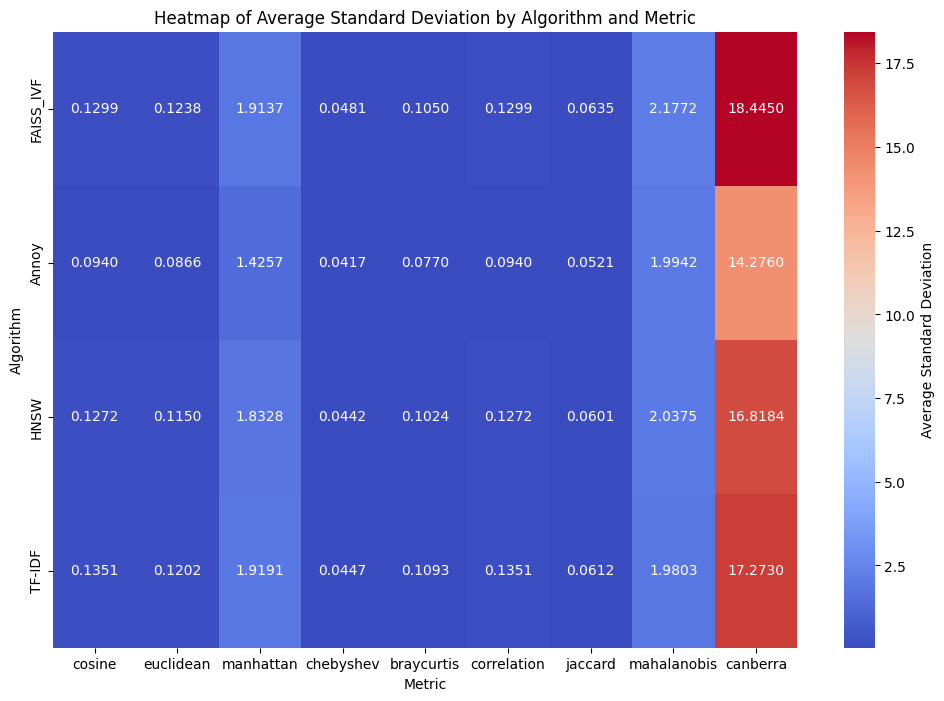

In [ ]:
import seaborn as sns


heatmap_data = pd.DataFrame(avg_std_devs).T
heatmap_data = heatmap_data.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={"label": "Average Standard Deviation"})
plt.title("Heatmap of Average Standard Deviation by Algorithm and Metric")
plt.ylabel("Algorithm")
plt.xlabel("Metric")
plt.show()


<Figure size 1200x600 with 0 Axes>

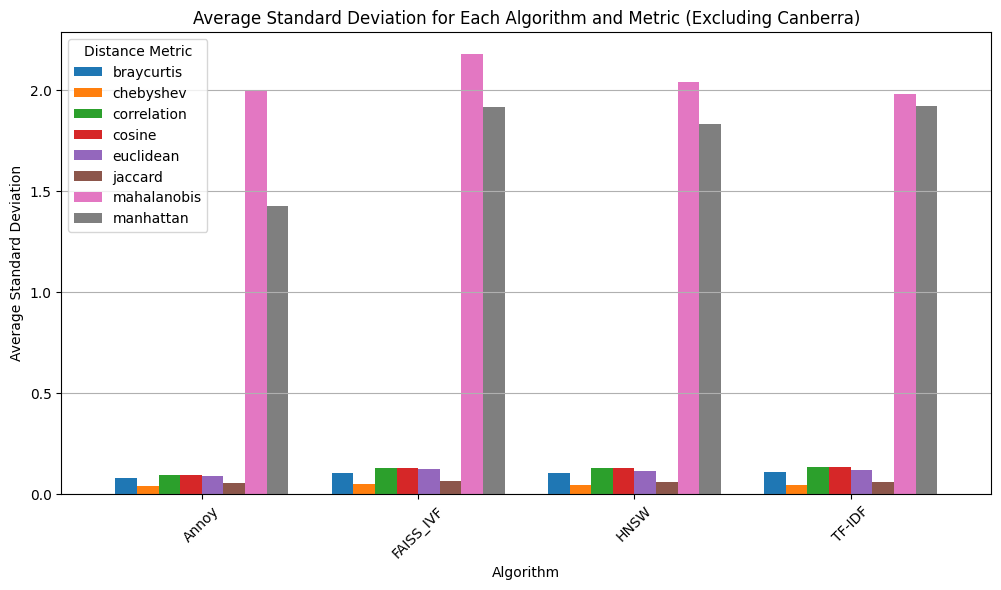

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization (ignoring Canberra metric)
bar_data = []
for algo, metrics in avg_std_devs.items():
    for metric, values in metrics.items():
        if metric != "canberra":  # Ignore Canberra metric
            avg_sd = np.mean(values)
            bar_data.append({"Algorithm": algo, "Metric": metric, "Average SD": avg_sd})

# Convert to DataFrame
bar_df = pd.DataFrame(bar_data)

# Bar plot
plt.figure(figsize=(12, 6))
# Changed from positional to keyword arguments for pivot
bar_df.pivot(index="Algorithm", columns="Metric", values="Average SD").plot(kind="bar", figsize=(12, 6), width=0.8)
plt.title("Average Standard Deviation for Each Algorithm and Metric (Excluding Canberra)")
plt.ylabel("Average Standard Deviation")
plt.xlabel("Algorithm")
plt.legend(title="Distance Metric")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

<ipython-input-19-81325211cc4c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  line_data = pd.DataFrame.from_dict(avg_std_devs, orient="index").applymap(


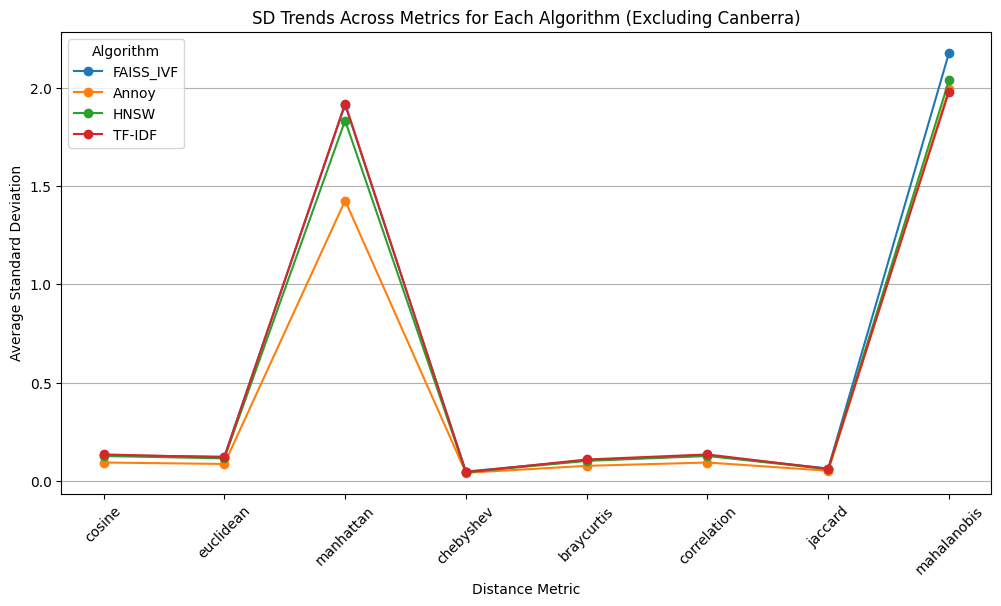

In [ ]:
# Prepare data for line plot
line_data = pd.DataFrame.from_dict(avg_std_devs, orient="index").applymap(
    lambda x: np.mean(x) if isinstance(x, list) else x
)
line_data = line_data.drop("canberra", axis=1, errors="ignore")  # Exclude Canberra if present

# Line plot
plt.figure(figsize=(12, 6))
for algo in line_data.index:
    plt.plot(line_data.columns, line_data.loc[algo], marker="o", label=algo)

plt.title("SD Trends Across Metrics for Each Algorithm (Excluding Canberra)")
plt.xlabel("Distance Metric")
plt.ylabel("Average Standard Deviation")
plt.xticks(rotation=45)
plt.legend(title="Algorithm", loc="upper left")
plt.grid(axis="y")
plt.show()
